In [29]:
from PIL import Image
import cv2
import imutils
import numpy as np
import matplotlib.pyplot as plt

In [16]:
def set_image_dpi(file_path):
    im = Image.open(file_path)
    length_x, width_y = im.size
    factor = min(1, float(1024.0 / length_x))
    size = int(factor * length_x), int(factor * width_y)
    im_resized = im.resize(size, Image.ANTIALIAS)
    im_resized.save('sample300.png', dpi=(300, 300))

In [17]:
set_image_dpi('sam.jpg')

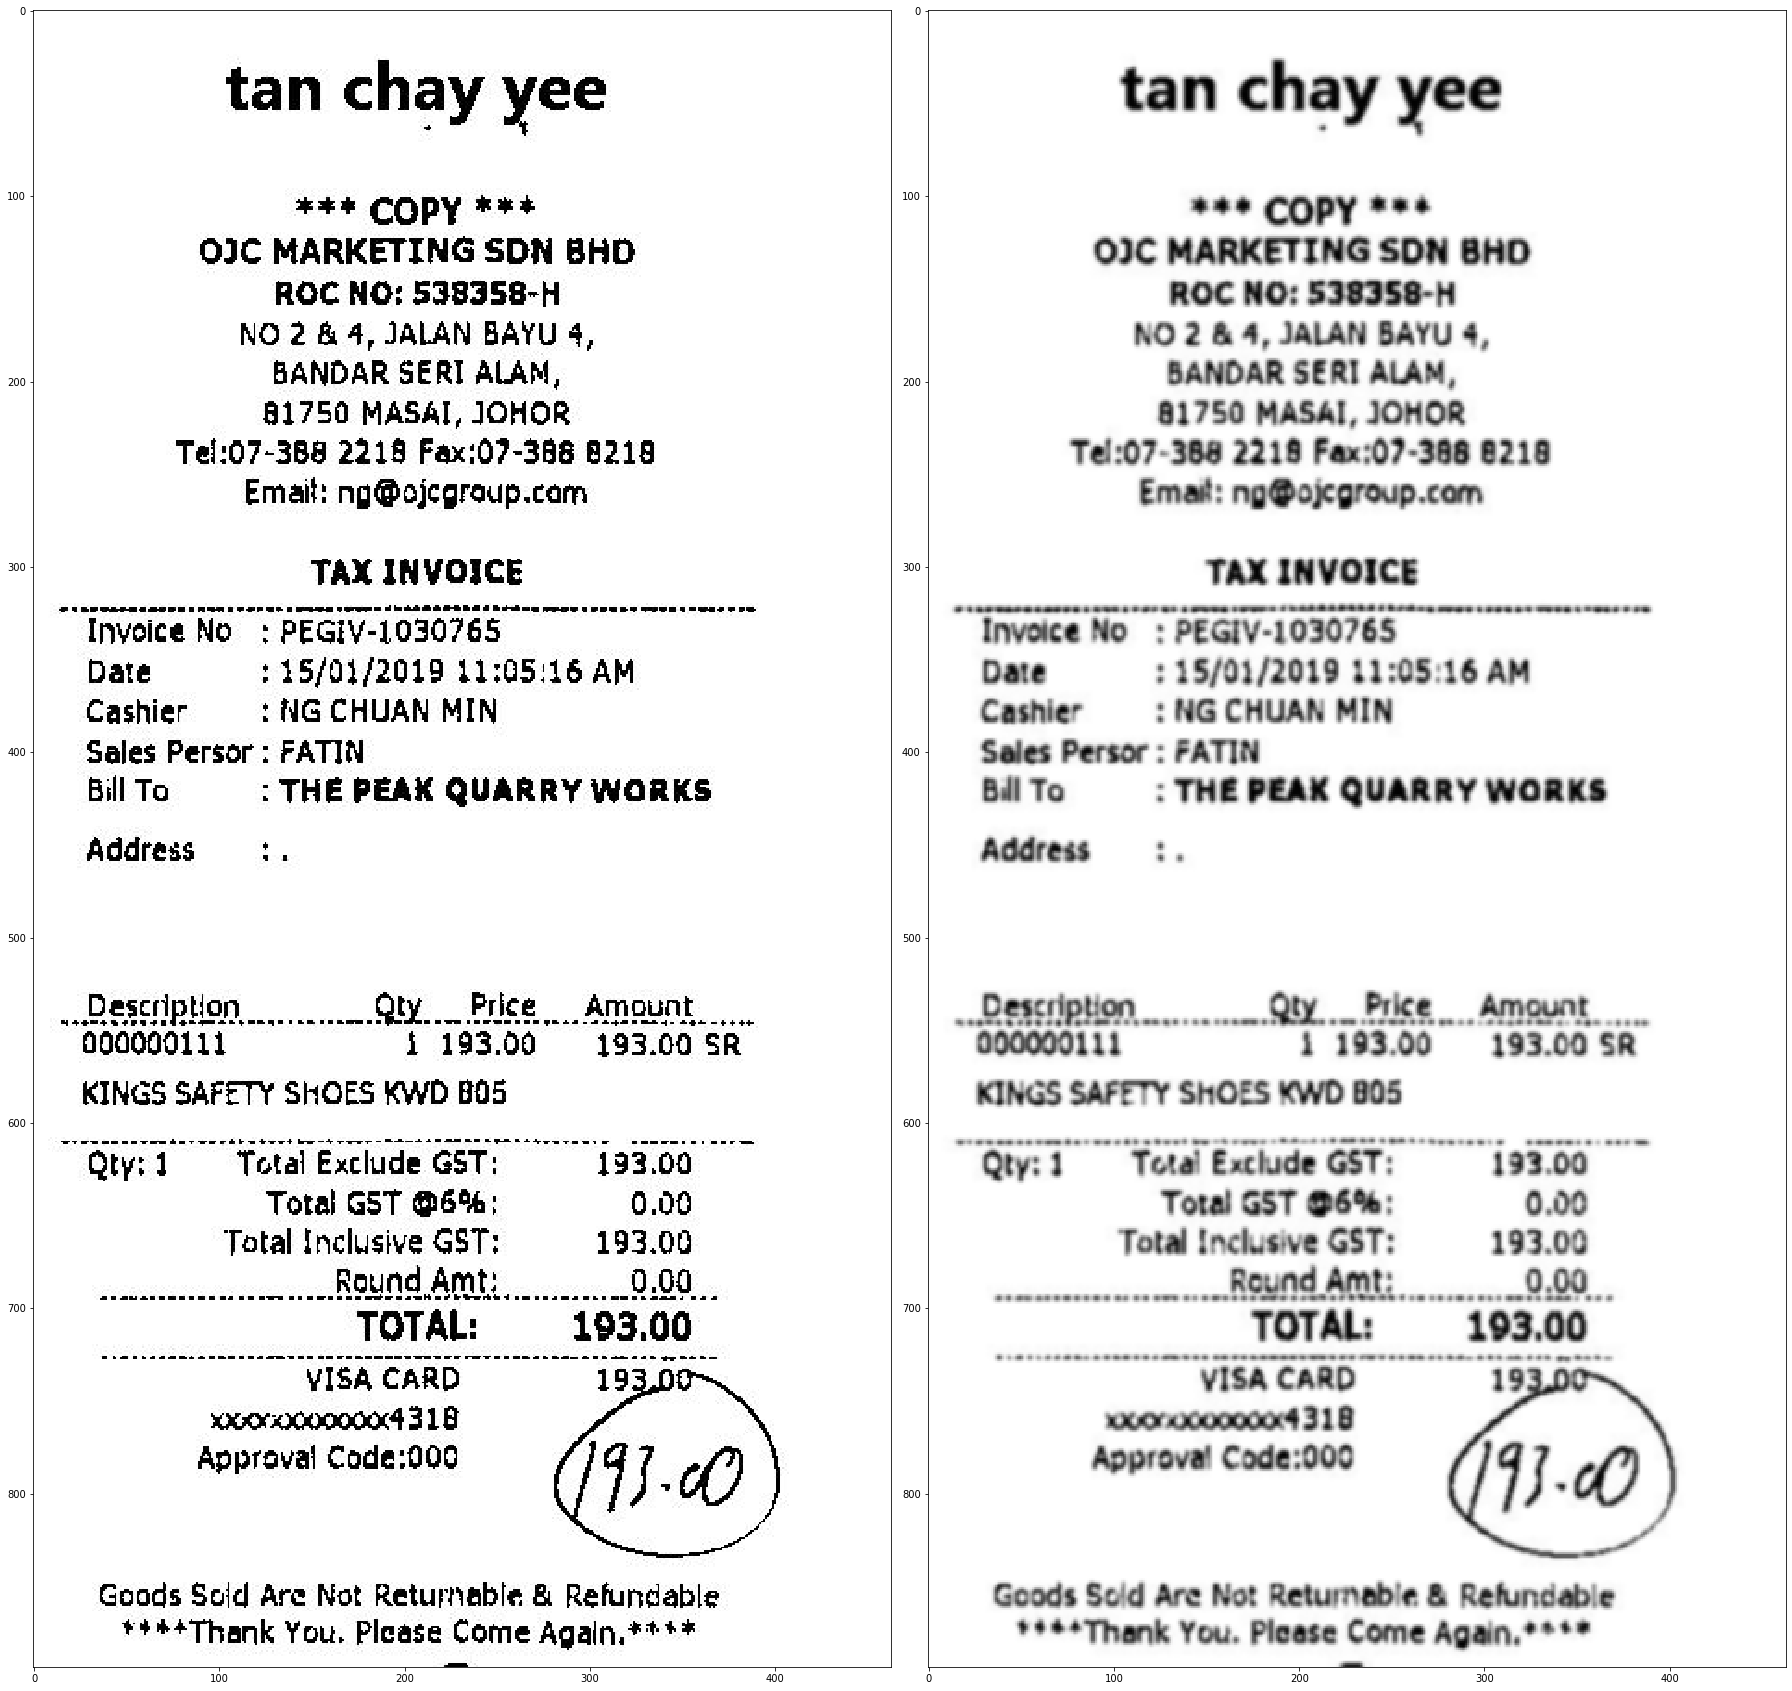

In [33]:
image = cv2.imread('sample300.png')

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (5, 5), 0)

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(25,40))

ax[0].imshow(image, cmap="gray")
ax[1].imshow(gray, cmap="gray")

plt.tight_layout()
plt.show()

In [27]:
def remove_noise_and_smooth(img):
    filtered = cv2.adaptiveThreshold(img.astype(np.uint8), 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 9, 41)
    kernel = np.ones((1, 1), np.uint8)
    opening = cv2.morphologyEx(filtered, cv2.MORPH_OPEN, kernel)
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel)
    #img = image_smoothening(img)
    or_image = cv2.bitwise_or(img, closing)
    return or_image

In [44]:
or_image = remove_noise_and_smooth(gray)

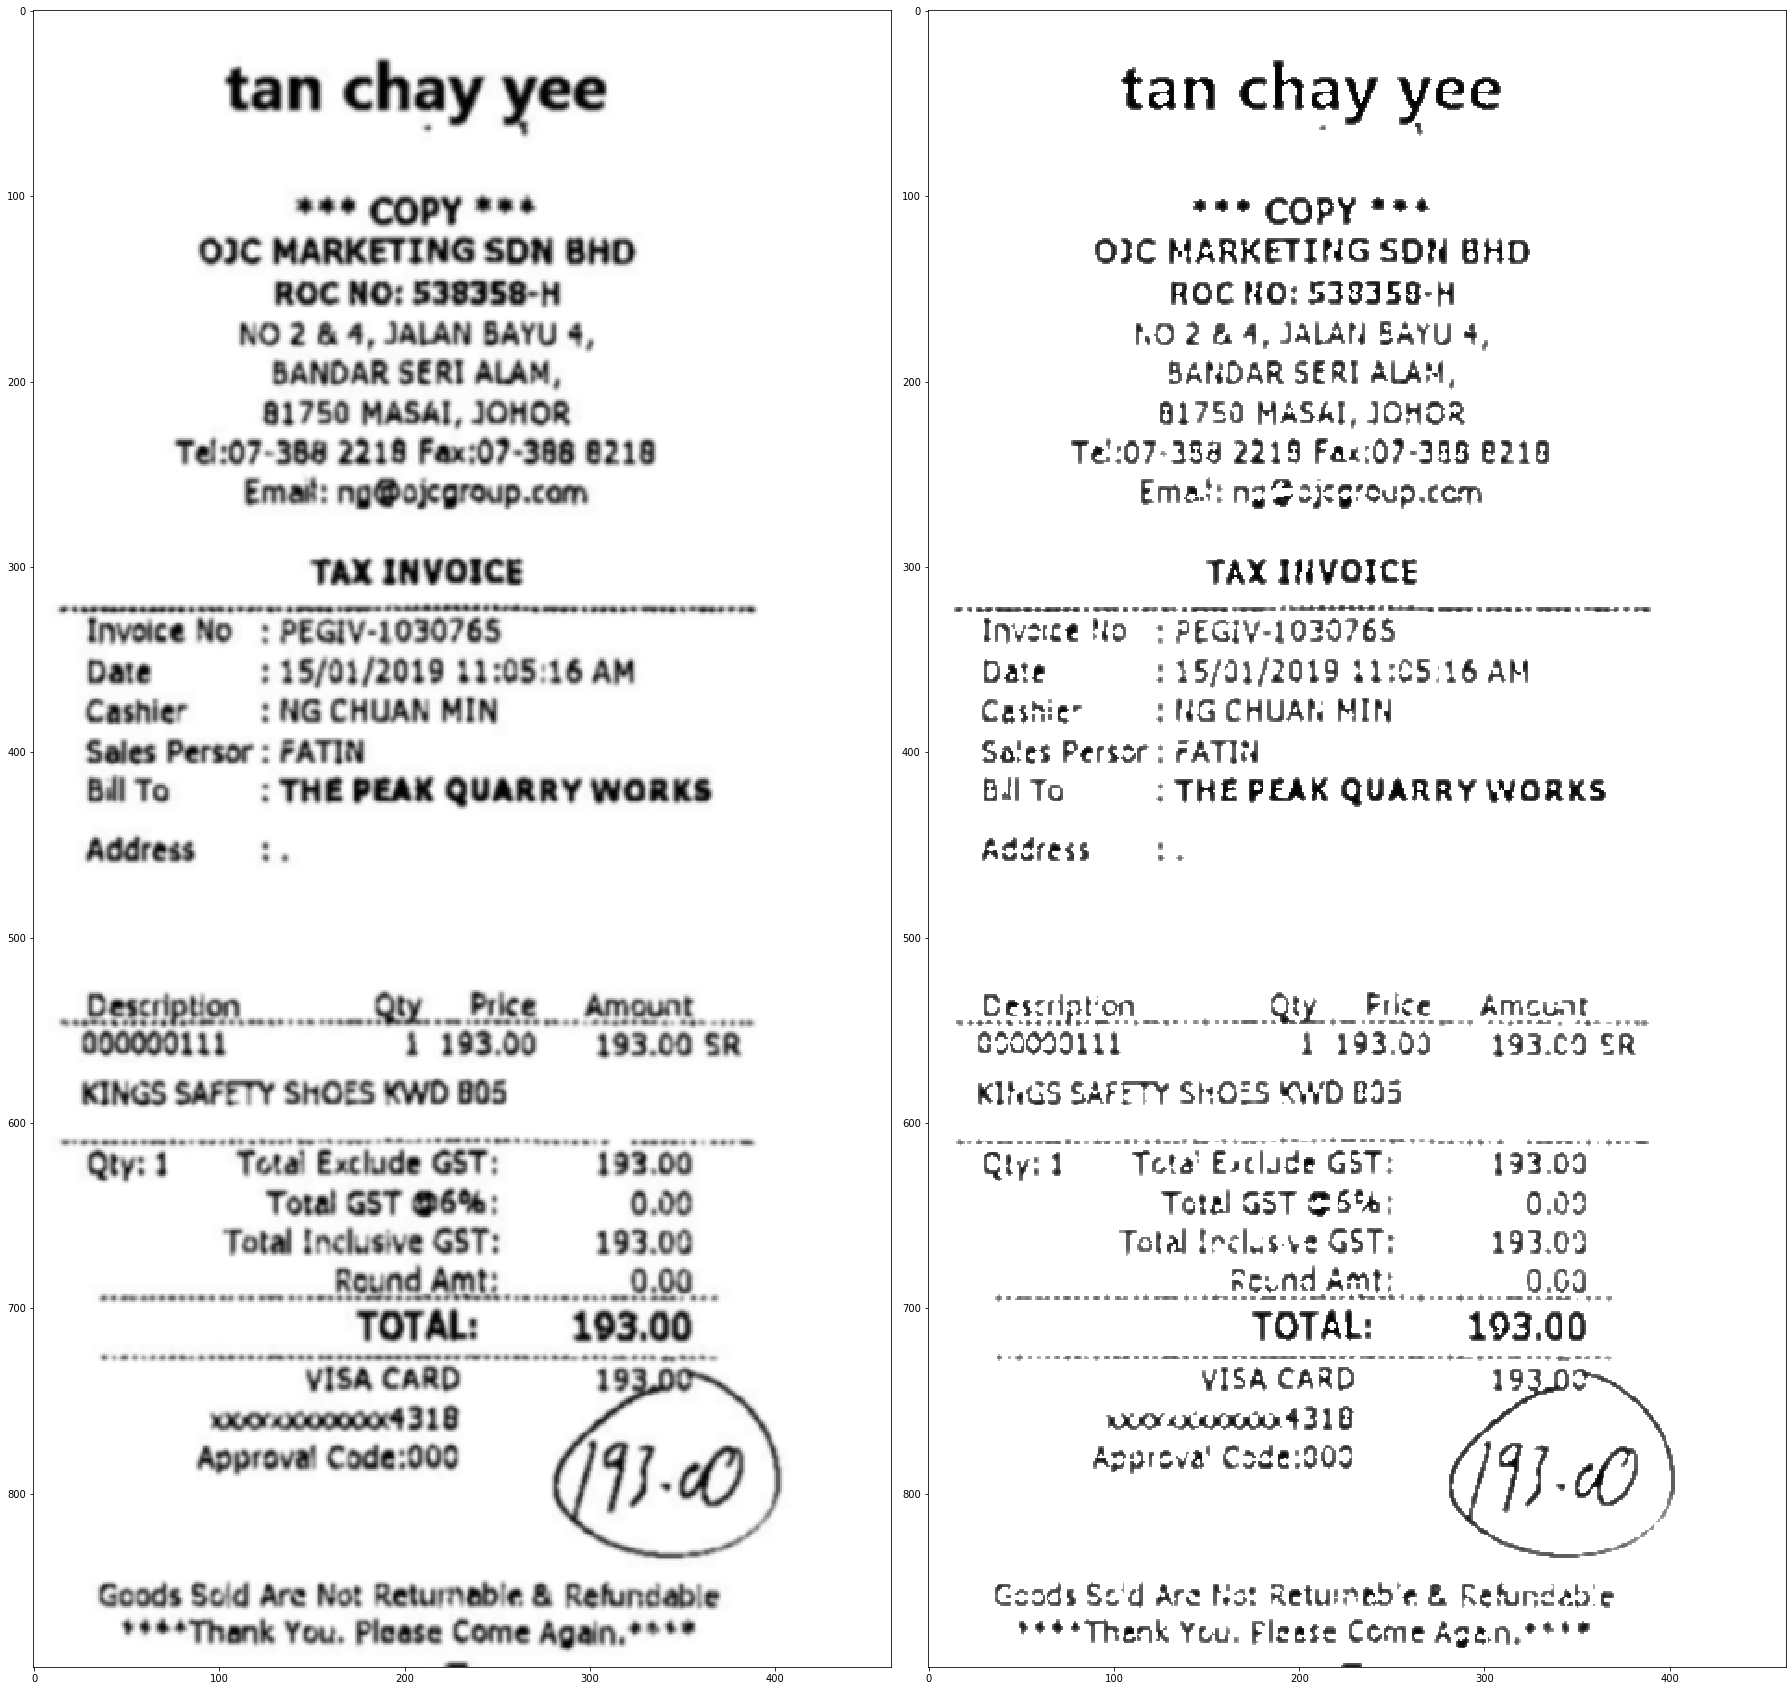

In [45]:
fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(25,40))

ax[0].imshow(gray, cmap="gray")
ax[1].imshow(or_image, cmap="gray")

plt.tight_layout()
plt.show()

In [46]:
cv2.imwrite('test1.png', or_image)

True

In [47]:
from tesserocr import PyTessBaseAPI
from tesserocr import PSM

tess = "C:/Users/shubh/Anaconda3/pkgs/tesserocr-2.4.0-py37_tesseract_4.0.0_0/Lib/site-packages/tesserocr/tessdata"
with PyTessBaseAPI(path=tess, lang='eng', psm=PSM.SPARSE_TEXT_OSD) as api:
    api.SetImageFile('test1.png')
    print(api.GetUTF8Text())

tan chay yee

see COPY **¢

03C MARKETING SDN BHD

ROC HO: 533358-H

KO 2 & 4, JALAN BAYU 4

BANDAR SERI ALAM

B1750 MASAL, JOHOR

Te!:07-388 2218 Fax:07-335 £218

Emat: ng22jgroup.cem

TAX INVOICE

e

e

e

Invaice !

o

PEGIV-1033765

Date

$15/01/2019 11:05:16 AM

Cashier

2 NG CHUAN MIN

Sales Persor: FATIH

Bll To

THE PEAK QUARRY WORKS

A2dress

.

<

Q.

Frig

Ame

20029111

119300

193.00 R

Leifis

SAFETY Sh

S

WD B3

Gy

Tete

sclade GST

133.00

Tetal GST £6%:

0.09

Total Inclusve GST:

193.03

Reund Amt:

0.6

TOTA

193.00

A CAl

oo o004 318

Azpreva’ C5de:003

5.0)

Gcods Scid Are Nst Returneb'e & Reful

e

*444Thenk You. Flzese Ceme Agan,

